In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Esercizio 3.1

L'obiettivo è stimare il prezzo futuro di un asset ad 1 anno in un mercato dove i prezzi sono modellizzati come un moto geometrico browniano. 

Con un'opzione call sull'asset si ha il diritto di comprare un'azione a un prezzo fisso, lo strike $K$, al tempo $T$. Dunque il payoff, ovvero il guadagno dell'operazione, sarà $\max(S(T) - K, 0)$: più il prezzo è alto al tempo $T$ rispetto al prezzo a cui si è effettuata la transazione, maggiore è il guadagno dall'operazione. Con un'opzione put invece si ha il diritto di vendere l'asset al tempo $T$ ad un prezzo fisso $K$. Usando la stessa logica il payoff è $\max(K - S(T), 0)$: più è basso il prezzo al tempo di vendita, maggiore è il guadagno ottenuto dall'operazione. 

S(T) simula il GBM:

$$S(T) = S(0)exp[(r -\frac{\sigma^2}{2})T + \sigma W(T)]$$
$$W(T) \sim \mathcal{N}(\mu, \sigma^2) $$

Per calcolare il prezzo ad oggi delle due opzioni devo calcolarne il payoff e poi moltiplicarlo per per un fattore di attualizzazione $exp(-rT)$. In pratica si calcola il valore atteso del payoff futuro al tempo $T$ e lo si riporta ad oggi attraverso $r$, che è il tasso di interesse privo di rischio, cioè il tasso che si otterrebbe investendo in un'attività completamente sicura.

I parametri della simulazione eseguita sono:
- Prezzo dell'asset a T = 0: S(0) = 100
- Scadenza: T = 1
- Strike: K = 100
- Tasso di interesse privo di rischio: r = 0.1
- Volatilità: $\sigma$ = 0.25

### Campionamento diretto e discretizzato

Con un campionamento diretto si calcola direttamente al tempo $T$ e si calcola il payoff attualizzato con questo valore. Con un campionamento discretizzato invece si divide $[0, T]$ in 100 intervalli temporali: $S(0), S(t_1), S(t_2), ..., S(T)$ affinchè il prezzo evolva iterativamente secondo la formula:

$$S(t_{i+1}) = S(t_i)exp[(\mu + \frac{\sigma^2}{2})(t_{i+1} - t_i) + \sigma Z_{i+1}\sqrt{t_{i+1} - t_i}]$$

$$Z_{i+1} \sim \mathcal{N}(0, 1)$$
Si usa poi $S(T)$ nel calcolo del payoff attualizzato.

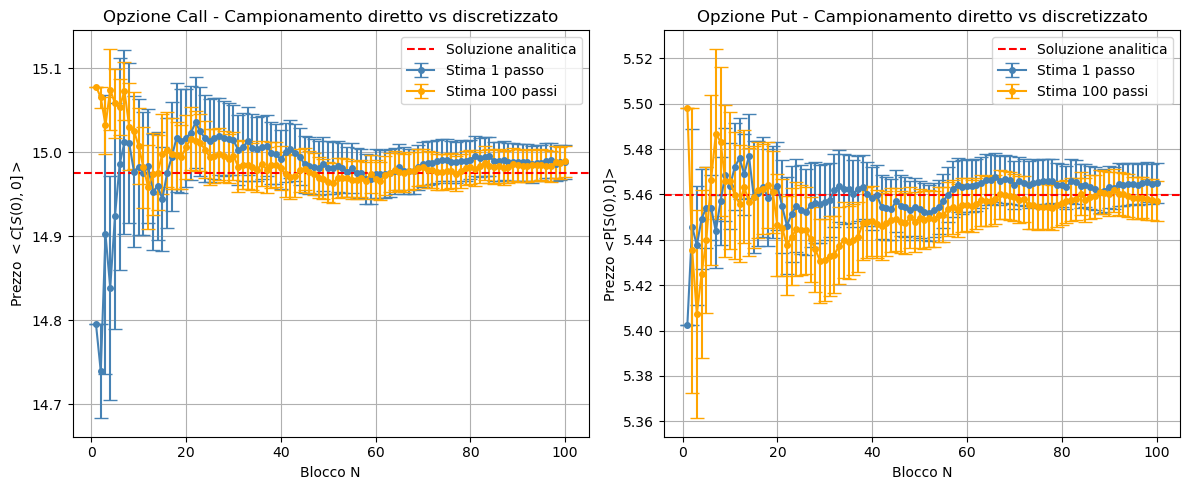

In [3]:
def leggi_dati(file_path):
    x, y, yerr = [], [], []
    with open(file_path, 'r') as f:
        for riga in f:
            if riga.strip():  # Salta righe vuote
                valori = list(map(float, riga.strip().split()))
                if len(valori) == 3:
                    x.append(valori[0])
                    y.append(valori[1])
                    yerr.append(valori[2])
    return np.array(x), np.array(y), np.array(yerr)

# Percorsi ai file di input
file1 = 'OUTPUT/results_direct_call.dat'
file2 = 'OUTPUT/results_discrete_call.dat'
file3 = 'OUTPUT/results_direct_put.dat'
file4 = 'OUTPUT/results_discrete_put.dat'

# Lettura dati
x1, y1, yerr1 = leggi_dati(file1)
x2, y2, yerr2 = leggi_dati(file2)

# Creazione figure e sottotrame
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Primo grafico
ax1.errorbar(x1, y1, yerr=yerr1, fmt='o-', capsize=5, markersize = 4, label='Stima 1 passo', color = 'steelblue')
ax1.errorbar(x2, y2, yerr=yerr2, fmt='o-', capsize=5, markersize = 4, label='Stima 100 passi', color = 'orange')
ax1.set_xlabel("Blocco N")
ax1.set_ylabel("Prezzo $<C[S(0),0]>$")
ax1.set_title("Opzione Call - Campionamento diretto vs discretizzato")
ax1.axhline(y=14.975790778311286, color='red', linestyle='--', label='Soluzione analitica')
ax1.grid(True)
ax1.legend()

x1, y1, yerr1 = leggi_dati(file3)
x2, y2, yerr2 = leggi_dati(file4)

# Secondo grafico
ax2.errorbar(x1, y1, yerr=yerr1, fmt='o-', capsize=5, markersize = 4, label='Stima 1 passo', color='steelblue')
ax2.errorbar(x2, y2, yerr=yerr2, fmt='o-', capsize=5, markersize = 4, label='Stima 100 passi', color='orange')
ax2.set_title("Opzione Put - Campionamento diretto vs discretizzato")
ax2.set_xlabel("Blocco N")
ax2.set_ylabel("Prezzo <P[S(0),0]>")
ax2.axhline(y=5.4595325819072364, color='red', linestyle='--', label='Soluzione analitica')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

Si noti come dopo iniziali fluttuazioni, ad un certo numero di simulazioni il valore del payoff futuro si stabilizza intorno al valore vero della soluzione analitica di Black-Scholes, confermando l'efficacia dei metodi Monte-Carlo nella valutazione di asset futuri. 

Il campionamento diretto è più efficiente computazionalmente e produce una stima con varianza inferiore, poiché utilizza la distribuzione esatta del prezzo finale dell’asset. Il campionamento discretizzato stima il percorso puntuale del valore dell'asset ed è pertanto soggetto a maggior varianza e a maggiori costi computazionali. Se il modello imponesse di tener conto di un'evoluzione temporale irregolare conviene utilizzare il campionamento discretizzato con $\Delta t$ non uniformi.